In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
college_data=pd.read_csv('./College.csv')
college_data.sample(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
255,Hiram College,Yes,922,729,244,37,66,1000,275,14067,4560,400,1000,75,95,10.6,34,12165,79
709,Vassar College,Yes,3550,1877,653,53,87,2164,77,18920,5950,600,800,90,98,9.7,39,17089,90
49,Berry College,Yes,1858,1221,480,37,68,1620,49,8050,3940,350,2375,80,80,16.3,17,10511,63
431,Ohio Northern University,Yes,2936,2342,669,35,62,2502,66,15990,4080,600,825,73,78,14.5,31,9979,83
741,Western Carolina University,No,3224,2519,1057,11,31,5000,706,6390,2380,110,1622,67,78,14.6,9,6554,55


In [3]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


In [4]:
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [5]:
print('College count = ',len(college_data.index))

College count =  777


In [6]:
college_data.isnull().any()

Unnamed: 0     False
Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

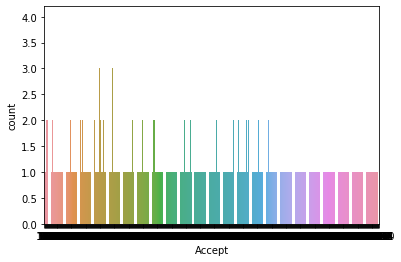

In [7]:
sns.countplot(x='Accept',data=college_data)

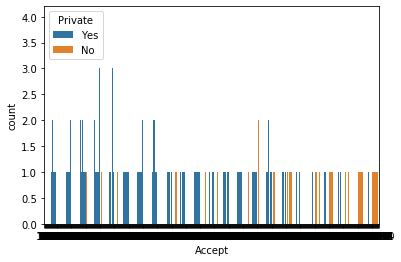

In [8]:
sns.countplot(x='Accept',hue='Private',data=college_data)

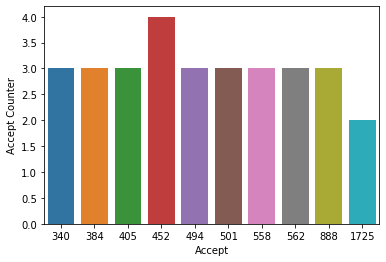

In [9]:
sns.barplot(college_data.Accept.value_counts()[:10].index,college_data.Accept.value_counts()[:10].values)
plt.xlabel('Accept')
plt.ylabel('Accept Counter')
plt.show()

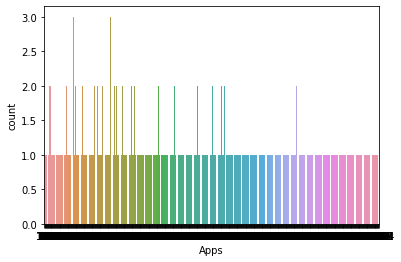

In [10]:
sns.countplot(x='Apps',data=college_data)

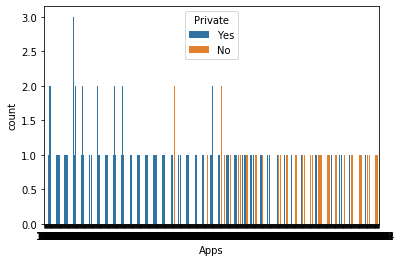

In [11]:
sns.countplot(x='Apps',hue='Private',data=college_data)

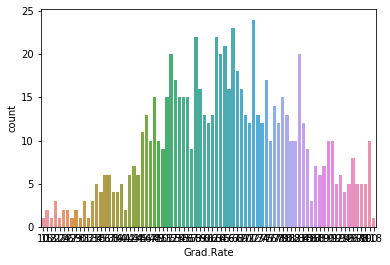

In [12]:
sns.countplot(x='Grad.Rate',data=college_data)

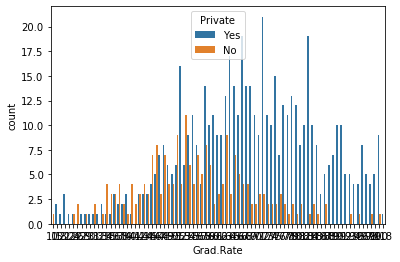

In [13]:
sns.countplot(x='Grad.Rate',hue='Private',data=college_data)

In [14]:
college_data[college_data['Grad.Rate'] >100].index

Int64Index([95], dtype='int64')

In [15]:
college_data[college_data['perc.alumni'] <100].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            767, 768, 769, 770, 771, 772, 773, 774, 775, 776],
           dtype='int64', length=777)

In [16]:
#setting the name of the college as the index
college_data = college_data.set_index('Unnamed: 0')

In [17]:
college_data[college_data['Grad.Rate'] >100].index

Index(['Cazenovia College'], dtype='object', name='Unnamed: 0')

In [18]:
college_data[college_data['perc.alumni'] <55].index

Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', name='Unnamed: 0', length=768)

In [19]:
dummies = pd.get_dummies(college_data.Private)

In [20]:
Outstate=pd.get_dummies(college_data['Outstate'],drop_first=True) #drop_first=True  One column is enough. 
Outstate

,2580,2700,3040,3460,3648,3687,3735,3738,3811,3840,...,19629,19670,19700,19760,19840,19900,19960,19964,20100,21700
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Abilene Christian University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adelphi University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adrian College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agnes Scott College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alaska Pacific University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xavier University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xavier University of Louisiana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
merged = pd.concat([college_data,dummies], axis = 1)

In [22]:
final = merged.drop(['Private','No'], axis = 1)

In [23]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [24]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

C:\Users\THRUPTHI KALLUGADDE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\THRUPTHI KALLUGADDE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

In [26]:
 X= final.drop("Grad.Rate",1)   #Feature Matrix
y = final["Grad.Rate"]          #Target Variable

#Adding constant column of ones, mandatory for sm.OLS model, default is added in the front, this is a dummy variable
#statsmodels api doesnt take the bias variable into reference
X_1 = sm.add_constant(X)

C:\Users\THRUPTHI KALLUGADDE\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const          6.148372e-12
Apps           3.389984e-03
Accept         4.199952e-01
Enroll         3.498139e-01
Top10perc      4.445007e-01
Top25perc      1.417909e-02
F.Undergrad    2.401378e-01
P.Undergrad    1.547707e-04
Outstate       1.488086e-05
Room.Board     1.246262e-03
Books          4.467391e-01
Personal       3.099993e-02
PhD            1.248590e-01
Terminal       2.310022e-01
S.F.Ratio      6.342535e-01
perc.alumni    1.914624e-08
Expend         3.162764e-03
Yes            4.660471e-02
dtype: float64

In [28]:
#Backward Elimination
cols = list(X.columns)
pmax = 1 #placeholder for new p-value max
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols) #not idexing the constant column     
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)


['Apps', 'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board', 'Personal', 'perc.alumni', 'Expend', 'Yes']


In [29]:
index_selected_features = []
for col in X[selected_features]:
    index_selected_features.append(X.columns.get_loc(col))

In [30]:
final[selected_features]

,Apps,Top25perc,P.Undergrad,Outstate,Room.Board,Personal,perc.alumni,Expend,Yes
Unnamed: 0,,,,,,,,,
Abilene Christian University,1660,52,537,7440,3300,2200,12,7041,1
Adelphi University,2186,29,1227,12280,6450,1500,16,10527,1
Adrian College,1428,50,99,11250,3750,1165,30,8735,1
Agnes Scott College,417,89,63,12960,5450,875,37,19016,1
Alaska Pacific University,193,44,869,7560,4120,1500,2,10922,1
...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,26,2029,6797,3900,1200,14,4469,0
Xavier University,1959,47,1107,11520,4960,1250,31,9189,1
Xavier University of Louisiana,2097,61,166,6900,4200,781,20,8323,1


In [31]:
x= final.loc[:, final.columns != 'Grad.Rate'].values
y = final.loc[:, 'Grad.Rate'].values

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x[:,index_selected_features], y, test_size = 0.8, random_state = 0)

In [33]:
#normalization of data 
scaler = StandardScaler()
X_train[:,:8] = scaler.fit_transform(X_train[:,:8])
X_test[:,:8] = scaler.transform(X_test[:,:8])